***

<center>
<tr><td><img src="African_School_of_Economics_Logo.png" width="300" height="90"/> </center>
    
# <center> <b> <span style="color:blue;"> African School of Economics </span> </b></center>
    
# <center> <b> <span style="color:orange;"> QuantEcon Final Project</span> </b></center>

## <center> <b> <span style="color:brown;">Teaching Assistants </span> </b></center> 
## <center> <b> <span style="color:black;"> Emile DJOHI, Stephen EZIN, Adbel TIDJANI </span> </b></center> 

## <center> <b> <span style="color:brown;">Written by : </span> </b></center> 
## <center> <b> <span style="color:black;"> José Thiéry M. Hagbe, jhagbe@africanschoolofeconomics.com</span> </b></center>

***

# 1- Dynamic equations

-Write a Python function to simulate an AR(p) process

-Plot the simulated data.

-Hint: - Here is the formula of an AR(p) process:

$$X_t=\sum_{i=1}^{p}\varphi_i X_{t-i}+\varepsilon_t$$

-  You can also generate ARMA processes using the ArmaProcess class from
statsmodels.tsa.arima_process

### Importing libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

### Function's parameters details

Within this exercise, it is question of an AR(p) process that Parameters are $(p,n,\varphi)$: where

    - p: The order of the AR process (p_order); an integer .
    
    - n: The number of data points to simulate (n_data_points); an integer.
    
    - $\varphi$: A list of coefficients for the AR process (phi_values); a list of floats.

    and returns:
    - ar_data: Simulated AR(p) data (numpy array).

### simulate_ar_process function codes

In [58]:
def simulate_ar_process(p_order, n_data_points, phi_values):
    
    # Check if the length of phi_values is equal to p_order
    # if len(phi_values) != p_order:
     #   raise ValueError("Error! The length of phi_values should be equal to p_order.")
    if len(phi_values) != p_order:
        assert False, "Error! The length of phi_values should be equal to p_order."


    # Create an ARMA process with AR(p_order) coefficients
    ar_process = ArmaProcess(ar=phi_values)

    # Simulate the AR(p_order) process
    ar_data = ar_process.generate_sample(nsample=n_data_points)

    # Plot the simulated data
    plt.figure(figsize=(10, 4))
    plt.plot(ar_data, label=f'AR({p_order}) Process')
    plt.xlabel('Times')
    plt.ylabel('Values')
    plt.title(f'Simulated AR({p_order}) Process')
    plt.legend()
    plt.grid(True)
    plt.show()

    return ar_data

### Implementing simulate_ar_process function

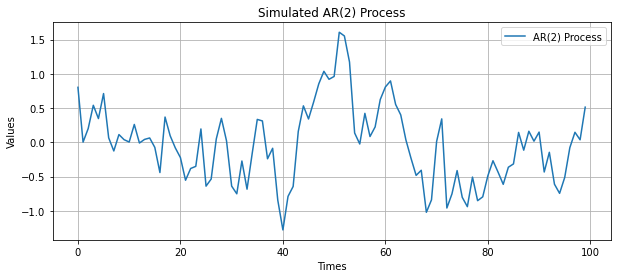

In [24]:
p_order = 2

n_data_points = 100

phi_values = [-2.3, 1.7]  # Replace with your own coefficients

simulated_data = simulate_ar_process(p_order, n_data_points, phi_values)

# 2-Law of Large number and Central Limit theorem

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1-Generate a random sample of size 500 from a population with a finite mean and variance.**

**2-Calculate the sample mean and sample standard deviation.**

In [25]:
population_mean = 50  
population_std = 10   
sample_size = 500 
num_samples = 1000

# Generate a list to store sample means
sample_means = []

for _ in range(num_samples):
    # Generate a random sample from the population
    random_sample = np.random.normal(population_mean, population_std, sample_size)
    
    # Step 2: Calculate the sample mean and sample standard deviation
    sample_mean = np.mean(random_sample)
    sample_std = np.std(random_sample, ddof=1)  # Use ddof=1 for sample standard deviation
    
    # Append the sample mean to the list
    sample_means.append(sample_mean)

**3-Plot a histogram of the sample means. How do we call the distribution of the sample means?
What theoritical distribution does it follow? What is the name of this law?**

No handles with labels found to put in legend.


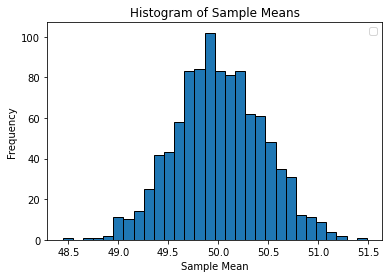

In [26]:
plt.hist(sample_means, bins=30, edgecolor='k')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.legend()
plt.show()

**4-Calculate the mean and standard deviation of the sample means.**

In [27]:
mean_of_sample_means = np.mean(sample_means) # Mean of sample_means calculation
std_of_sample_means = np.std(sample_means, ddof=1) # Standard daviation of sample_means calculation

**5-Compare the mean and standard deviation of the sample means with the population mean
and standard deviation.**

In [28]:
# Step 6: Compare with population mean and population standard deviation
print(f"Population Mean: {population_mean}")
print(f"Population Std Deviation: {population_std}")
print(f"Mean of Sample Means: {mean_of_sample_means}")
print(f"Std Deviation of Sample Means: {std_of_sample_means}")

Population Mean: 50
Population Std Deviation: 10
Mean of Sample Means: 50.01166052607546
Std Deviation of Sample Means: 0.4408552669097664


**6-How do we call the standard deviation of the sample means?**

**#The standard deviation of the sample means is called the Standard Error of the Mean (SEM)**

**-How to get the standard deviation of the population from the standard deviation of the samples means?**

  **#To estimate population std from SEM, use the formula: population_std = SEM * sqrt(sample_size)**

In [30]:
estimated_population_std = std_of_sample_means * np.sqrt(sample_size)
print(f"Estimated Population Std Deviation: {estimated_population_std}")

Estimated Population Std Deviation: 9.857823450490514


**7-What do you notice the more you increase the sample size?**

**# You can change sample_size and num_samples to experiment with different sample sizes**

**What is the name of this law?**

**# This phenomenon is known as the Central Limit Theorem (CLT)**

# 3-Monte-Carlo and option pricing

### Importing librairies 

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

### American put class

In [9]:
class AmericanPut:
    def __init__(self, K, T, r, sigma, N, M):
        self.K = K            # Strike price
        self.T = T            # Time to maturity
        self.r = r            # Risk-free interest rate
        self.sigma = sigma    # Volatility
        self.N = N            # Number of time steps
        self.M = M            # Number of simulations

    def basis_functions(self, x):
        return np.column_stack((np.ones_like(x), x, x**2, x**3))

    def payoff(self, S):
        return np.maximum(self.K - S, 0)

    def generate_paths(self):
        dt = self.T / self.N
        S0 = 100
        S = np.zeros((self.M, self.N + 1))
        S[:, 0] = S0

        for i in range(self.N):
            eps = np.random.normal(size=self.M)
            S[:, i + 1] = S[:, i] * np.exp((self.r - 0.5 * self.sigma**2) * dt +
                                          self.sigma * np.sqrt(dt) * eps)

        return S

    def calculate_payoff(self, S):
        return self.payoff(S)

    def backward_induction(self, S, payoffs):
        option_values = np.copy(payoffs)

        for t in range(self.N - 1, 0, -1):
            x = S[:, t]
            y = option_values[:, t + 1] * np.exp(-self.r * (self.T - t) / self.N)

            # Least squares regression
            basis_matrix = self.basis_functions(x)
            params, _ = curve_fit(lambda x, a, b, c, d: a + b * x + c * x**2 + d * x**3, x, y)
            continuation_value = np.dot(basis_matrix, params)

            # Exercise decision
            option_values[:, t] = np.maximum(self.payoff(x), continuation_value)

        return option_values

    def calculate_option_value(self):
        S = self.generate_paths()
        payoffs = self.calculate_payoff(S)
        option_values = self.backward_induction(S, payoffs)

        # Calculate option value as the average discounted option value
        option_value = np.mean(option_values[:, 1] * np.exp(-self.r * self.T / self.N))

        return option_value

if __name__ == "__main__":
    K = 100
    T = 1
    r = 0.05
    sigma = 0.2
    N = 100
    M = 10000

    option_pricing = AmericanPut(K, T, r, sigma, N, M)
    option_value = option_pricing.calculate_option_value()

    print(f"American Put Option Value: ${option_value:.4f}")

American Put Option Value: $74.2605


# 4-Simple Bank Account System

### Create an Account class with the following attributes:
** Account number**
** Account holder name**
** Account balance**

In [4]:
class Account:
    def __init__(self, account_number, account_holder, balance=0):
        self.account_number = account_number
        self.account_holder = account_holder
        self.balance = balance
        

        # ***************** display account details method *****************
        
    def display_details(self):
        print(f"Account Number: {self.account_number}")
        print(f"Account Holder: {self.account_holder}")
        print(f"Account Balance: ${self.balance:.2f}")
        
        
       #********** deposit method ********************
    
    def deposit(self, amount):
        if amount > 0:
            self.balance += amount
            print(f"Deposited ${amount:.2f}. New balance: ${self.balance:.2f}")
        else:
            print("Invalid deposit amount. Amount must be greater than zero.")
            
            
       # ************* withdraw method **************** 
    
    def withdraw(self, amount):
        if amount > 0 and amount <= self.balance:
            self.balance -= amount
            print(f"Withdrew ${amount:.2f}. New balance: ${self.balance:.2f}")
        else:
            print("Invalid withdrawal amount or insufficient balance.")
            
            
     #************* transfer method *******************
    
    def transfer(self, target_account, amount):
        if amount > 0 and amount <= self.balance:
            self.balance -= amount
            target_account.balance += amount
            print(f"Transferred ${amount:.2f} to {target_account.account_holder}. New balance: ${self.balance:.2f}")



### Create a Bank class that keeps track of accounts

In [5]:
class Bank:
    def __init__(self):
        self.accounts = []
    
    
    #************ add account method ************
    
    def add_account(self, account):
        self.accounts.append(account)

        
        
     # ************** remove account method *************
    
    def remove_account(self, account):
        if account in self.accounts:
            self.accounts.remove(account)
            print("Account removed.")
        else:
            print("Account not found in the bank.")
            
            
            
      # ************* display_accounts method ***************************
    
    def display_accounts(self):
        print("List of Accounts:")
        for account in self.accounts:
            print(f"Account Number: {account.account_number}")
            print(f"Account Holder: {account.account_holder}")
            print(f"Account Balance: ${account.balance:.2f}")
            print("-" * 30)


### Testing the Bank Account System

In [6]:

if __name__ == "__main__":
    bank = Bank()

    #************* Create accounts *************************
    account1 = Account(1002614, "Hélène", 63700)
    account2 = Account(2535002, "Dossou", 3500)
    account3 = Account(27539903, "Tchabi", 22000)

    # ************Add accounts to the bank *********************
    bank.add_account(account1)
    bank.add_account(account2)
    bank.add_account(account3)

    #******************** Display accounts in the bank ******************
    bank.display_accounts()

    
    # ****************** Deposit, withdraw, and transfer **********************
    account1.deposit(200)
    account2.withdraw(500)
    account1.transfer(account2, 350)

    # ************************Display account details***************************
    account1.display_details()
    account2.display_details()

    # **************** Remove an account from the bank ******************************
    bank.remove_account(account3)

    # ************ Display updated account list*********************************
    bank.display_accounts()

List of Accounts:
Account Number: 1002614
Account Holder: Hélène
Account Balance: $63700.00
------------------------------
Account Number: 2535002
Account Holder: Dossou
Account Balance: $3500.00
------------------------------
Account Number: 27539903
Account Holder: Tchabi
Account Balance: $22000.00
------------------------------
Deposited $200.00. New balance: $63900.00
Withdrew $500.00. New balance: $3000.00
Transferred $350.00 to Dossou. New balance: $63550.00
Account Number: 1002614
Account Holder: Hélène
Account Balance: $63550.00
Account Number: 2535002
Account Holder: Dossou
Account Balance: $3350.00
Account removed.
List of Accounts:
Account Number: 1002614
Account Holder: Hélène
Account Balance: $63550.00
------------------------------
Account Number: 2535002
Account Holder: Dossou
Account Balance: $3350.00
------------------------------


# 5-Bayesian updating

### 5.1-Importing librairies

In [49]:
import numpy as np
import scipy.stats as stats # this is what we called approp
import seaborn as sns
import matplotlib.pyplot as plt

**Define the prior distribution of theta as a uniform distribution on [0,1], ...**

In [50]:
n_points = 100

# grid of points
x_grid = np.linspace(0, 1, n_points) 

# prior distribution
prior = np.ones(n_points) / n_points  

# True value of theta
true_theta = 0.314

# Number of observations
num_observations = 100

# Initialize an empty list to store posterior distributions after each update
posterior_distributions = []

### Generate 100 random variables with θ = 0.314

In [51]:
simulated_data = np.random.binomial(1, true_theta, size=num_observations)

### Bayesian updating for each observation

**Computing of:**

    -the likelihood of the data given theta
    
    -the unnormalized posterior distribution
    
    -the posterior distribution(normalized) stored into posterior_distributions

In [52]:
for obs in simulated_data:
    # Step 2: Calculate the likelihood using the binomial distribution
    likelihood = stats.binom.pmf(obs, 1, x_grid)
    
    # Step 3: Multiply prior by likelihood to obtain unnormalized posterior
    posterior = prior * likelihood
    
    # Step 4: Normalize the posterior distribution
    posterior /= np.sum(posterior)
    
    # Step 5: Store the posterior distribution
    posterior_distributions.append(posterior)

### Visualize the posterior distributions after each update

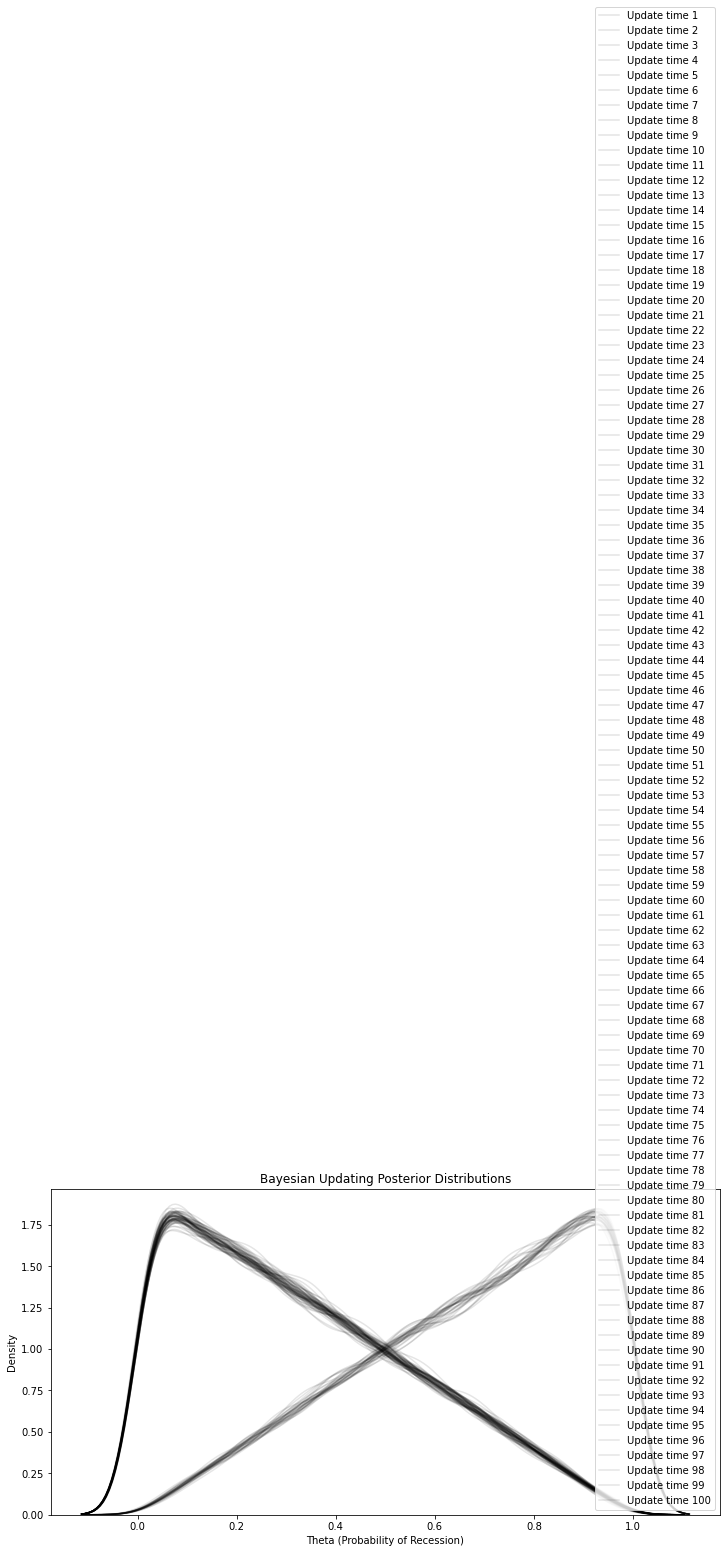

In [55]:
plt.figure(figsize=(12, 6))
for i, posterior in enumerate(posterior_distributions):
    sns.kdeplot(np.random.choice(x_grid, size=10000, p=posterior), color='black', alpha=0.1, 
                label=f'Update time {i + 1}')

plt.title('Bayesian Updating Posterior Distributions')

plt.xlabel('Theta (Probability of Recession)')

plt.ylabel('Density')

plt.legend()

plt.show()

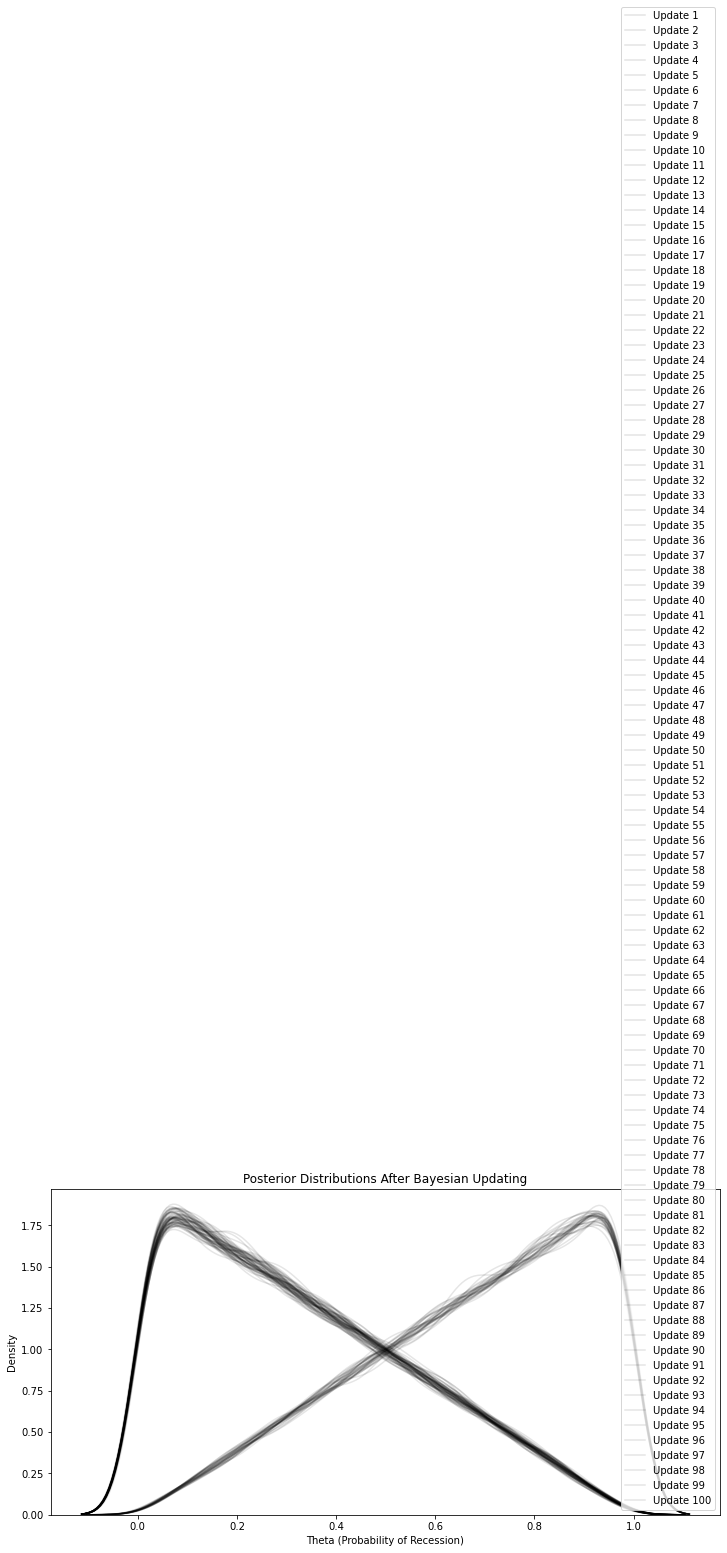

In [33]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Define the prior distribution as a uniform distribution on [0, 1]
n_points = 100
x_grid = np.linspace(0, 1, n_points)
prior = np.ones(n_points) / n_points

# True value of theta
true_theta = 0.314

# Number of observations
num_observations = 100

# Initialize an empty list to store posterior distributions after each update
posterior_distributions = []

# Step 6: Generate 100 random variables with θ = 0.314
simulated_data = np.random.binomial(1, true_theta, size=num_observations)

# Bayesian updating for each observation
for obs in simulated_data:
    # Step 2: Calculate the likelihood using the binomial distribution
    likelihood = stats.binom.pmf(obs, 1, x_grid)
    
    # Step 3: Multiply prior by likelihood to obtain unnormalized posterior
    posterior = prior * likelihood
    
    # Step 4: Normalize the posterior distribution
    posterior /= np.sum(posterior)
    
    # Step 5: Store the posterior distribution
    posterior_distributions.append(posterior)

# Visualize the posterior distributions after each update
plt.figure(figsize=(12, 6))
for i, posterior in enumerate(posterior_distributions):
    sns.kdeplot(np.random.choice(x_grid, size=10000, p=posterior), color='black', alpha=0.1, label=f'Update {i + 1}')
plt.title('Posterior Distributions After Bayesian Updating')
plt.xlabel('Theta (Probability of Recession)')
plt.ylabel('Density')
plt.legend()
plt.show()
